In [66]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df=pd.DataFrame(data=data)
df.shape

(887, 8)

In [5]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [7]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [9]:
df1=df.copy()

In [10]:
df1.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [11]:
df1.drop('Name',axis=1,inplace=True)

In [12]:
df1.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [13]:
le=LabelEncoder()
df1['Sex']=le.fit_transform(df1['Sex'])

In [14]:
df1.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [15]:
df1.dtypes

Survived                     int64
Pclass                       int64
Sex                          int32
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [16]:
df1.skew()

Survived                   0.470999
Pclass                    -0.623409
Sex                       -0.611636
Age                        0.447189
Siblings/Spouses Aboard    3.686760
Parents/Children Aboard    2.741198
Fare                       4.777671
dtype: float64

In [17]:
z=np.abs(zscore(df1))
z

array([[0.79216345, 0.83052363, 0.74026551, ..., 0.42990395, 0.4749808 ,
        0.50358635],
       [1.26236574, 1.56127657, 1.35086667, ..., 0.42990395, 0.4749808 ,
        0.78341245],
       [1.26236574, 0.83052363, 1.35086667, ..., 0.47585568, 0.4749808 ,
        0.49001959],
       ...,
       [0.79216345, 0.83052363, 1.35086667, ..., 0.42990395, 2.00330136,
        0.17798419],
       [1.26236574, 1.56127657, 0.74026551, ..., 0.47585568, 0.4749808 ,
        0.04633641],
       [0.79216345, 0.83052363, 0.74026551, ..., 0.47585568, 0.4749808 ,
        0.4935369 ]])

In [18]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  49,  58,  67,  70,  85,  87, 117, 118, 158,
       163, 166, 170, 179, 181, 200, 232, 257, 259, 264, 276, 297, 309,
       322, 339, 358, 375, 378, 384, 434, 435, 435, 477, 524, 538, 539,
       554, 564, 607, 627, 635, 675, 676, 680, 683, 686, 697, 713, 726,
       732, 733, 738, 770, 775, 783, 788, 809, 820, 842, 846, 847, 854,
       859, 881], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 6, 4,
       4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 6, 4, 4, 6, 5, 5, 3, 5,
       5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 5, 6, 4, 4, 4, 4, 4, 4, 3, 5, 4,
       5], dtype=int64))


In [19]:
df2=df1[(z<3).all(axis=1)]

In [20]:
df2.shape

(821, 7)

In [21]:
df2.skew()

Survived                   0.452876
Pclass                    -0.615060
Sex                       -0.666108
Age                        0.443197
Siblings/Spouses Aboard    1.974350
Parents/Children Aboard    2.115156
Fare                       2.301914
dtype: float64

In [22]:
df2.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [23]:
x=df2.iloc[:,1:]

In [24]:
x.head

<bound method NDFrame.head of      Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         3    1  22.0                        1                        0   
1         1    0  38.0                        1                        0   
2         3    0  26.0                        0                        0   
3         1    0  35.0                        1                        0   
4         3    1  35.0                        0                        0   
..      ...  ...   ...                      ...                      ...   
882       2    1  27.0                        0                        0   
883       1    0  19.0                        0                        0   
884       3    0   7.0                        1                        2   
885       1    1  26.0                        0                        0   
886       3    1  32.0                        0                        0   

        Fare  
0     7.2500  
1    71.2833  
2     7.9250

In [25]:
y=df2.iloc[:,0]

In [26]:
x.shape

(821, 6)

In [27]:
y.head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 821, dtype: int64>

In [28]:
y.shape

(821,)

In [29]:
df2.corr()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.313682,-0.555199,-0.094768,0.093335,0.199496,0.326282
Pclass,-0.313682,1.000000,0.130841,-0.388953,-0.049975,-0.077231,-0.691553
Sex,-0.555199,0.130841,1.000000,0.109313,-0.198082,-0.250367,-0.240980
Age,-0.094768,-0.388953,0.109313,1.000000,-0.188925,-0.251381,0.181569
Siblings/Spouses Aboard,0.093335,-0.049975,-0.198082,-0.188925,1.000000,0.308366,0.247162
Parents/Children Aboard,0.199496,-0.077231,-0.250367,-0.251381,0.308366,1.000000,0.260504
Fare,0.326282,-0.691553,-0.240980,0.181569,0.247162,0.260504,1.000000


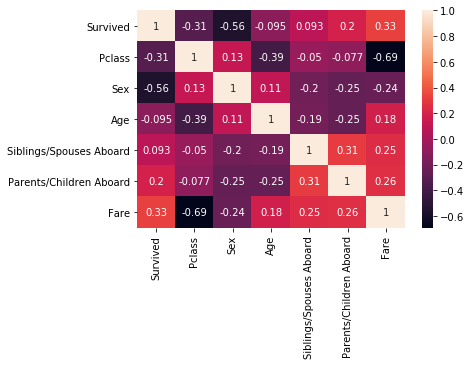

In [30]:
sns.heatmap(df2.corr(),annot=True)

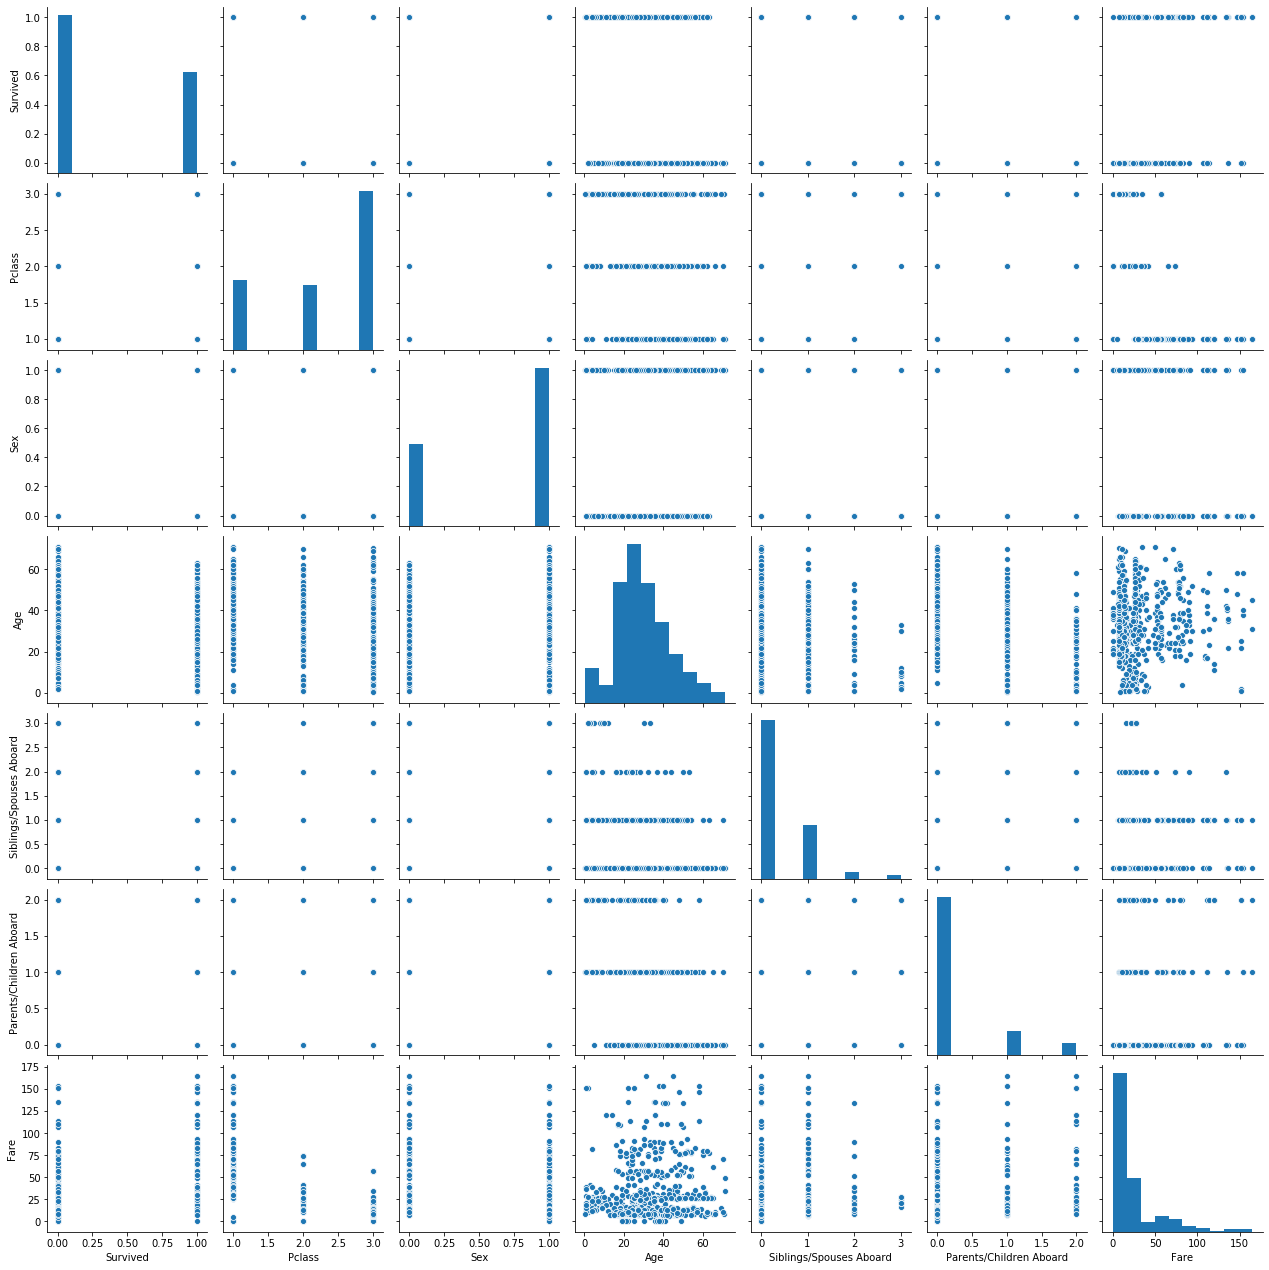

In [31]:
sns.pairplot(df2)

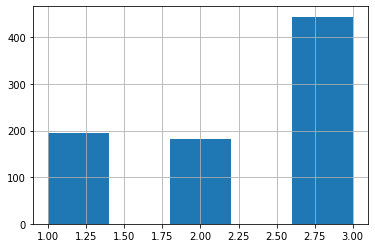

In [32]:
df2.Pclass.hist(bins=5)

In [33]:
df2.Pclass.value_counts()

3    444
1    195
2    182
Name: Pclass, dtype: int64

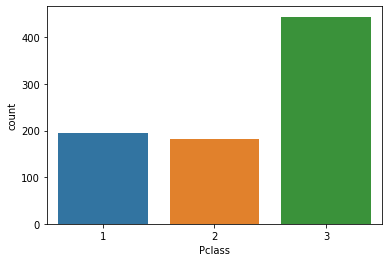

In [34]:
sns.countplot(df2['Pclass'])

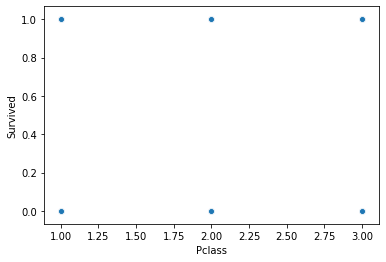

In [35]:
sns.scatterplot(data=df2,x='Pclass',y='Survived')

In [36]:
df2.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


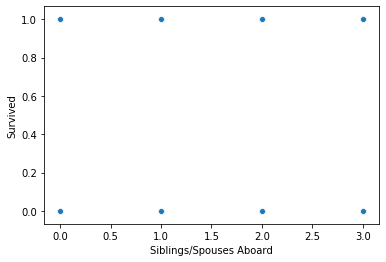

In [37]:
sns.scatterplot(data=df2,x='Siblings/Spouses Aboard',y='Survived')

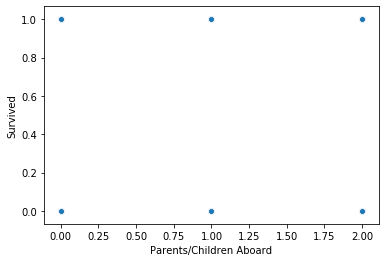

In [38]:
sns.scatterplot(data=df2,x='Parents/Children Aboard',y='Survived')

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()

In [41]:
x=sc.fit_transform(x)

In [42]:
df2.skew()

Survived                   0.452876
Pclass                    -0.615060
Sex                       -0.666108
Age                        0.443197
Siblings/Spouses Aboard    1.974350
Parents/Children Aboard    2.115156
Fare                       2.301914
dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
m=MinMaxScaler()

In [45]:
x=m.fit_transform(x)

In [46]:
df2.skew()

Survived                   0.452876
Pclass                    -0.615060
Sex                       -0.666108
Age                        0.443197
Siblings/Spouses Aboard    1.974350
Parents/Children Aboard    2.115156
Fare                       2.301914
dtype: float64

In [47]:
maxr=0
for i in range(41,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('Maximum score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.8081180811808119
accuracy score correspondng to random state 42 is: 0.8081180811808119
accuracy score correspondng to random state 43 is: 0.8228782287822878
accuracy score correspondng to random state 44 is: 0.7601476014760148
accuracy score correspondng to random state 45 is: 0.7490774907749077
accuracy score correspondng to random state 46 is: 0.8339483394833949
accuracy score correspondng to random state 47 is: 0.8007380073800738
accuracy score correspondng to random state 48 is: 0.8044280442804428
accuracy score correspondng to random state 49 is: 0.7564575645756457
accuracy score correspondng to random state 50 is: 0.8044280442804428
accuracy score correspondng to random state 51 is: 0.7822878228782287
accuracy score correspondng to random state 52 is: 0.7785977859778598
accuracy score correspondng to random state 53 is: 0.8154981549815498
accuracy score correspondng to random state 54 is: 0.7638376383763837
accuracy score corre

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,test_size=0.33)

In [49]:
lg.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
pred=lg.predict(x_test) 

In [51]:
accuracy_score(y_test,pred) 

0.8339483394833949

In [52]:
confusion_matrix(y_test,pred) 

array([[143,  23],
       [ 22,  83]], dtype=int64)

In [53]:
print('classification report:','\n',classification_report(y_test,pred))

classification report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.78      0.79      0.79       105

    accuracy                           0.83       271
   macro avg       0.82      0.83      0.83       271
weighted avg       0.83      0.83      0.83       271



In [54]:
print(pred)

[0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 1 1]


In [55]:
cv=cross_val_score(lg,x,y,cv=10)
print(cv.mean())

0.7929033205994711


In [56]:
model=[KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is
0.8154981549815498
[[143  23]
 [ 27  78]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       166
           1       0.77      0.74      0.76       105

    accuracy                           0.82       271
   macro avg       0.81      0.80      0.80       271
weighted avg       0.81      0.82      0.81       271



accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state

In [68]:
rf=RandomForestClassifier(n_estimators=100,random_state=55)

In [69]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9836363636363636


In [70]:
print(predr)

[0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 1 1]


In [60]:
from sklearn.externals import joblib

In [61]:
joblib.dump(rf,'rftitanic.obj')

['rftitanic.obj']